In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time

In [25]:
# Values of Thetas as given in question
theta_given = np.array([3,1,2])

M = 1000000         # No. of Samples
# generating samples for x1, x1 and noise
x1 = np.random.normal(3, np.sqrt(4), M)
x2 = np.random.normal(-1, np.sqrt(4), M)
g_noise = np.random.normal(0, np.sqrt(2), M)

# Converting into 2D  array
x0 = np.array([np.ones(M)])
x1 = np.array([x1])
x2 = np.array([x2])
X_sample = np.concatenate((x0, x1, x2), axis=0)  #(3, 1000000)
Y_sample = np.matmul(theta_given, X_sample) + g_noise      #(1000000,)

In [26]:
# Assigning the batch size
batch_size = 1
splits = round(M/batch_size)
# Spliting into total No. batches
X_batch = np.array(np.array_split(X_sample, splits, axis=1))
Y_batch = np.array(np.array_split(Y_sample, splits))

In [27]:
# For training the model using stochastic gradient descent initializin Thetas 
Theta = np.zeros(3)
# Storing Thetas and cost with each update
Theta_store = np.array([Theta])
cost_store = np.array([])

eta = 0.001     #Learning Rate

# Calculating the cost
def cost_fn(X,Theta,Y,m):
    err = Y - np.matmul(Theta, X)
    J_theta = (1/(2*m)) * np.sum((err)**2)
    return J_theta
        

# Updating the Thetas
def grade_dec(X,Theta,Y,m):
    err2 = Y - np.matmul(Theta, X)
    sm = np.zeros(3)
    for j in range(m):
        sm += err2[j] * X[:,j]

    d_theta = (eta/m)*sm
    Theta += d_theta

# inital cost 
cost_store = np.append(cost_store, cost_fn(X_sample, Theta, Y_sample, Y_sample.size))
print("initial cost: ", cost_store[-1])

start = time.time()

itr = 0
cond_sat = True
# Keep updating Thetas until stopping criteria hits
while(cond_sat):
    itr += 1
    for i in range(splits):
        grade_dec(X_batch[i], Theta, Y_batch[i], Y_batch[0].size)
        Theta_store = np.append(Theta_store, [Theta], axis=0)
        # print(Theta, itr, i)
        # for batch size 1 checkng convergence after 10000 samples
        # for batch size 100 checkng convergence after 100 samples
        # for batch size 10000 checkng convergence after 100 samples
        # for batch size 1000000 checkng convergence after batch end (i == 0)
        # if (i == 0):
        if (i%10000 == 0 and i != 0):
            temp_cost = cost_fn(X_sample, Theta_store[-2], Y_sample, Y_sample.size)
            cost_store = np.append(cost_store, temp_cost)
            temp_cost = cost_fn(X_sample, Theta, Y_sample, Y_sample.size)
            cost_store = np.append(cost_store, temp_cost)
            if abs(cost_store[-2] - cost_store[-1]) <= 4e-4 :
                cond_sat = False
                break
            else:
                continue



end = time.time()
print("iterations: ", itr)
print("Final Cost:", temp_cost) 
print("Theta Learned: ", Theta)
print("Difference in Thetas diff[theta0, theta1, theta2] = ", theta_given - Theta)
print("Time Taken: ", end - start)
# Model Training is  completed

initial cost:  19.038662365972176
iterations:  1
Final Cost: 1.0070378478667013
Theta Learned:  [2.99310197 1.03592003 2.02555801]
Difference in Thetas diff[theta0, theta1, theta2] =  [ 0.00689803 -0.03592003 -0.02555801]
Time Taken:  1.439338207244873


In [28]:
dataset = pd.read_csv("q2test.csv")
X_1 = np.array(dataset["X_1"])
X_2 = np.array(dataset["X_2"])
Y_ = np.array(dataset["Y"])

X0 = np.array([np.ones(X_1.shape)])
X1 = np.array([X_1])
X2 = np.array([X_2])

X = np.concatenate((X0, X1, X2), axis=0)
Y = np.array([Y_])

err_L = cost_fn(X, Theta_store[-1], Y, Y.size)
print("For Learned model error on new test data: ", err_L)

err_O = cost_fn(X, theta_given, Y, Y.size)
print("For Original model error on new test data: ", err_O)

print("The difference of error in original and learned model for new test data is: ", err_L-err_O)

For Learned model error on new test data:  1.0743047801490078
For Original model error on new test data:  0.9829469215
The difference of error in original and learned model for new test data is:  0.0913578586490078


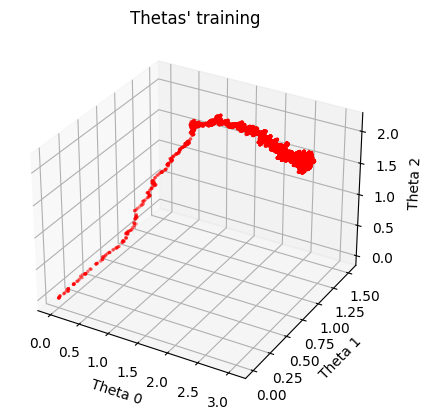

In [29]:
Theta0 = Theta_store[:, 0]
Theta1 = Theta_store[:, 1]
Theta2 = Theta_store[:, 2]

fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.set_title('Thetas\' training')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel("Theta 2")
ax.scatter(Theta0, Theta1, Theta2, c = 'r', marker='.', linewidths=0.1)
plt.show()